#Clustering KNeighborsClassifier - predict the city

In [ ]:
#Initial test: Creating a decision tree. Decision tree just uses max and min temp as x values (for now), to predict a city

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("NorthAmericaCityAirbnb.csv"))

In [3]:
df

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,$38.00,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,$133.00,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,$252.00,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,$40.00,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,$135.00,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
248816,7788,"Washington,DC",Kia,"Shaw, Logan Circle",38.90567,-77.02976,Entire serviced apartment,Entire home/apt,$183.00,91,329,NaN
248817,7789,"Washington,DC",Kia,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92104,-77.03229,Entire serviced apartment,Entire home/apt,$169.00,91,301,NaN
248818,7790,"Washington,DC",Antonio,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.92801,-76.99795,Entire townhouse,Entire home/apt,$68.00,30,175,NaN
248819,7791,"Washington,DC",Connie,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.96935,-77.00764,Private room in bed and breakfast,Private room,$60.00,14,364,NaN


In [ ]:
y = df["City"]

In [ ]:
X= df[["temp_max", "temp_min"]]

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

In [ ]:
data_point = [[-2, 8]]

model.predict(data_point)

# Let's reduce dataset to Dec. 20 - Dec. 29 to see if model score increases (Only Max. and Min. temp)

In [6]:
# 1.We find the variable types of each column - We need to change date to a date-time variable
df.dtypes

City            object
Date            object
Temperature    float64
temp_max       float64
temp_min       float64
humidity       float64
precip         float64
snow           float64
windspeed      float64
conditions      object
dtype: object

In [7]:
# We create a column with date as a datetime
df['Time_stamp'] = pd.to_datetime(df['Date'].str.strip(), format='%Y/%m/%d')

In [8]:
#User would imput this value
df['day'] = df.Time_stamp.dt.day
df['month'] = df.Time_stamp.dt.month
df['year'] = df.Time_stamp.dt.year

In [9]:
df

,City,Date,Temperature,temp_max,temp_min,humidity,precip,snow,windspeed,conditions,Time_stamp,day,month,year
0,"Montreal, QC",2020-01-01,0.2,1.1,-0.8,87.84,5.71,0.00,7.9,Rain,2020-01-01,1,1,2020
1,"Montreal, QC",2020-01-02,0.9,2.6,-1.0,78.70,0.00,0.00,7.7,Clear,2020-01-02,2,1,2020
2,"Montreal, QC",2020-01-03,4.8,5.8,2.8,74.88,0.00,0.00,7.6,Clear,2020-01-03,3,1,2020
3,"Montreal, QC",2020-01-04,0.5,3.2,-1.9,78.79,2.27,0.00,11.2,Rain,2020-01-04,4,1,2020
4,"Montreal, QC",2020-01-05,-5.3,-1.8,-9.9,69.09,0.76,3.88,13.1,Snow,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,"Washington, DC",2020-12-27,1.0,5.6,-3.6,60.64,0.00,0.00,17.2,Partially cloudy,2020-12-27,27,12,2020
12806,"Washington, DC",2020-12-28,6.1,11.3,1.6,64.95,0.00,0.00,19.5,Partially cloudy,2020-12-28,28,12,2020
12807,"Washington, DC",2020-12-29,3.8,6.2,0.3,46.13,0.00,0.00,32.7,Partially cloudy,2020-12-29,29,12,2020
12808,"Washington, DC",2020-12-30,3.8,7.8,-0.3,52.82,0.00,0.00,29.0,Overcast,2020-12-30,30,12,2020


In [ ]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31


In [ ]:
df_new = df[(df.month == Month) & (df.day >= Start_Day) & (df.day <= End_Day)]

In [ ]:
df_new

In [ ]:
y = df_new3["City"]

In [ ]:
X= df_new3[["temp_max", "temp_min"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
data_point = [[15, 10]]

model.predict(data_point)

# Let's keep same period of time and add humidity

In [ ]:
y = df_new["City"]

In [ ]:
X= df_new[["temp_max", "temp_min", "humidity"]] #"humidity", "windspeed", "precip", "snow"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#For humidity, maybe the user inputs very high high, medium or low --> very high 80 , high 65, medium 40, low 20
data_point = [[-5, -10, 80]]

model.predict(data_point)

# Neighbors

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#df['Price'] = df['Price'].str.replace('$','')
#df['Price'] = df['Price'].str.replace(',','')
#df['Price'] = pd.to_numeric(df['Price'])
#df.dropna(subset = ["Reviews Scores Rating"], inplace=True)

In [28]:
df

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,38.0,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,133.0,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,252.0,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,40.0,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,135.0,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
248816,7788,"Washington,DC",Kia,"Shaw, Logan Circle",38.90567,-77.02976,Entire serviced apartment,Entire home/apt,183.0,91,329,NaN
248817,7789,"Washington,DC",Kia,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92104,-77.03229,Entire serviced apartment,Entire home/apt,169.0,91,301,NaN
248818,7790,"Washington,DC",Antonio,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.92801,-76.99795,Entire townhouse,Entire home/apt,68.0,30,175,NaN
248819,7791,"Washington,DC",Connie,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.96935,-77.00764,Private room in bed and breakfast,Private room,60.0,14,364,NaN


In [51]:
df.dropna(subset = ["Reviews Scores Rating"], inplace=True)
df
#df_filtered = df[(df.City == "Montreal,QC")]
#df_filtered

,Unnamed: 0,City,Host Name,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Price,Minimum Nights,Availability 365,Reviews Scores Rating
0,0,"Montreal,QC",Nelia,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room in house,Private room,38.0,2,42,93.0
1,1,"Montreal,QC",Maryline,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,133.0,2,343,94.0
2,2,"Montreal,QC",Maryline,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,252.0,3,352,92.0
3,3,"Montreal,QC",Gail,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,40.0,2,318,90.0
4,4,"Montreal,QC",Alain,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire apartment,Entire home/apt,135.0,4,358,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
248724,7696,"Washington,DC",Nick,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90364,-77.02152,Entire apartment,Entire home/apt,68.0,1,20,100.0
248732,7704,"Washington,DC",Deondra,"Fairfax Village, Naylor Gardens, Hillcrest, Su...",38.86122,-76.94883,Private room in condominium,Private room,66.0,1,262,100.0
248738,7710,"Washington,DC",Crystal,"Brightwood Park, Crestwood, Petworth",38.95626,-77.02344,Entire condominium,Entire home/apt,89.0,2,353,100.0
248758,7730,"Washington,DC",Joseph,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91794,-77.01280,Entire house,Entire home/apt,399.0,2,150,100.0


In [37]:
X= df[["Price", "Reviews Scores Rating"]]

In [38]:
y = df["City"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
X_scaler = StandardScaler().fit(X_train)

In [42]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
model1.score(X_test_scaled, y_test)

0.08008356545961003

In [45]:
train_score = []
test_score = []
for k in range(1, 20, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))


1 0.15328990869571335 0.07592639486789905
3 0.13782164010073014 0.08008356545961003
5 0.14438457534362206 0.08780703975690048
7 0.1586781277697275 0.10230438085591288
9 0.16612737581069484 0.11258124419684308
11 0.17244411305412136 0.12085338060268422
13 0.1766927871020385 0.1270574829070651
15 0.17911959595391175 0.13218536338313497
17 0.18014659332311025 0.1356883599223432
19 0.18348785188728353 0.13940238034945557


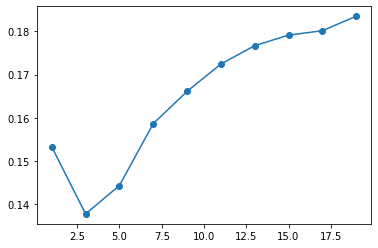

In [46]:
plt.plot(range(1, 20, 2), train_score, marker='o')

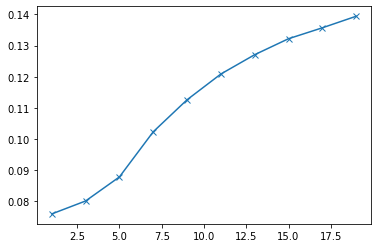

In [47]:
plt.plot(range(1, 20, 2), test_score, marker="x")

In [48]:
data_point = [[3.1, 0, 90...]]

model1.predict(data_point)

SyntaxError: invalid syntax (<ipython-input-48-dcb57b1e4376>, line 1)

# Le'ts reduce dataset

In [25]:
#Top 5 and bottom 5 based on temperature:
df_average_temperature = df[df.City.isin(["Quebec City, QC", "New Brunswick, NB", "Twin Cities, MN", "Ottawa, ON", "Montreal, QC", "Hawaii, HI", "Broward County, FL", "New Orleans, LA", "Austin, TX", "Clark County, NV"])]

In [26]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31

In [10]:
#Top 5 and bottom 5 based on latitude:

df_lat = df[df.City.isin(["Hawaii, HI", "Broward County, FL", "New Orleans, LA", "Austin, TX", "San Diego, CA", "Vancouver, BC", "Seattle, WA", "Quebec City, QC", "New Brunswick, NB", "Portland, OR"])]

In [11]:
df_lat

,City,Date,Temperature,temp_max,temp_min,humidity,precip,snow,windspeed,conditions,Time_stamp,day,month,year
366,"New Brunswick, NB",2020-01-01,-1.6,-0.9,-3.3,85.81,1.11,0.0,19.6,Snow,2020-01-01,1,1,2020
367,"New Brunswick, NB",2020-01-02,-1.3,0.9,-3.1,77.94,2.80,0.0,23.2,Snow,2020-01-02,2,1,2020
368,"New Brunswick, NB",2020-01-03,-0.4,3.1,-3.7,86.05,1.30,0.0,10.4,Snow,2020-01-03,3,1,2020
369,"New Brunswick, NB",2020-01-04,0.2,2.3,-3.0,88.24,1.11,0.0,11.1,Rain,2020-01-04,4,1,2020
370,"New Brunswick, NB",2020-01-05,-2.6,-0.8,-7.1,83.28,1.91,0.0,26.5,Snow,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,"Seattle, WA",2020-12-27,5.9,8.5,2.0,87.36,1.77,0.0,10.0,"Rain, Overcast",2020-12-27,27,12,2020
12074,"Seattle, WA",2020-12-28,3.6,8.4,-0.3,84.62,0.00,0.0,11.3,Partially cloudy,2020-12-28,28,12,2020
12075,"Seattle, WA",2020-12-29,3.2,4.7,1.0,84.13,1.29,0.0,12.9,"Rain, Overcast",2020-12-29,29,12,2020
12076,"Seattle, WA",2020-12-30,6.6,8.7,4.4,91.82,12.24,0.0,30.2,"Rain, Overcast",2020-12-30,30,12,2020


In [27]:
#Answers to be provided by user
Month = 12
Start_Day = 21
End_Day = 31

In [41]:
df_new_lat = df_lat[(df.month == Month) & (df.day >= Start_Day) & (df.day <= End_Day)]

<ipython-input-41-1b2208e003b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new_lat = df_lat[(df.month == Month) & (df.day >= Start_Day) & (df.day <= End_Day)]


In [59]:
X= df_new_lat[["temp_max", "temp_min", "humidity"]] #, "snow"

In [60]:
y = df_new_lat["City"]

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
X_scaler = StandardScaler().fit(X_train)

In [64]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
model1.score(X_test_scaled, y_test)

0.5714285714285714

In [67]:
train_score = []
test_score = []
for k in range(1, 20, 2): 
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  train_score.append(model.score(X_train_scaled, y_train))
  test_score.append(model.score(X_test_scaled, y_test))
  print(k, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))


1 1.0 0.6428571428571429
3 0.8170731707317073 0.5714285714285714
5 0.7195121951219512 0.5714285714285714
7 0.6829268292682927 0.5
9 0.6585365853658537 0.5357142857142857
11 0.6585365853658537 0.5
13 0.6341463414634146 0.5357142857142857
15 0.5609756097560976 0.42857142857142855
17 0.5121951219512195 0.2857142857142857
19 0.45121951219512196 0.32142857142857145


In [40]:
#top 3 bottom 3 and 3 in

df_lat = df[df.City.isin(["Hawaii, HI", "Broward County, FL", "New Orleans, LA", "San Francisco, CA", "Nashville, TN", "Vancouver, BC", "Seattle, WA", "Quebec City, QC", "Columbus, OH", "Toronto, ON"])]

In [68]:
data_point = [[3.1, 0, 90]]

model1.predict(data_point)

array(['Vancouver, BC'], dtype=object)